In [1]:
import numpy as np
import requests
import scipy.io.wavfile as wavfile
import io
from IPython.display import Audio
from IPython.core.display import HTML
import matplotlib.pyplot as plt

In [3]:
def disp_audio(clip, rate):
    display(HTML(Audio(data = clip, rate = rate)._repr_html_()))

Sound file from [https://philharmonia.co.uk/resources/sound-samples/](https://philharmonia.co.uk/resources/sound-samples/). (Converted from mp3 to wav using `ffmpeg`)

In [114]:
rate, bassoon_A2 = wavfile.read("bassoon_A2_1_forte_normal.wav")
bassoon_A2 = bassoon_A2.astype(float)
print("Real bassoon A2 note:")
disp_audio(bassoon_A2, rate)

Real bassoon A2 note:


In [115]:
rate, bass_A2 = wavfile.read("double-bass_A1_1_forte_arco-normal.wav")
bass_A2 = bass_A2.astype(float)
print("Real bass A2 note:")
disp_audio(bass_A2, rate)

Real bass A2 note:


In [48]:
freq = 110
n = np.arange(rate)
sin_A2 = np.sin(2.0 * np.pi * n * freq / rate)

print("Sine Wave A2 note:")
disp_audio(sin_A2, rate)

Sine Wave A2 note:


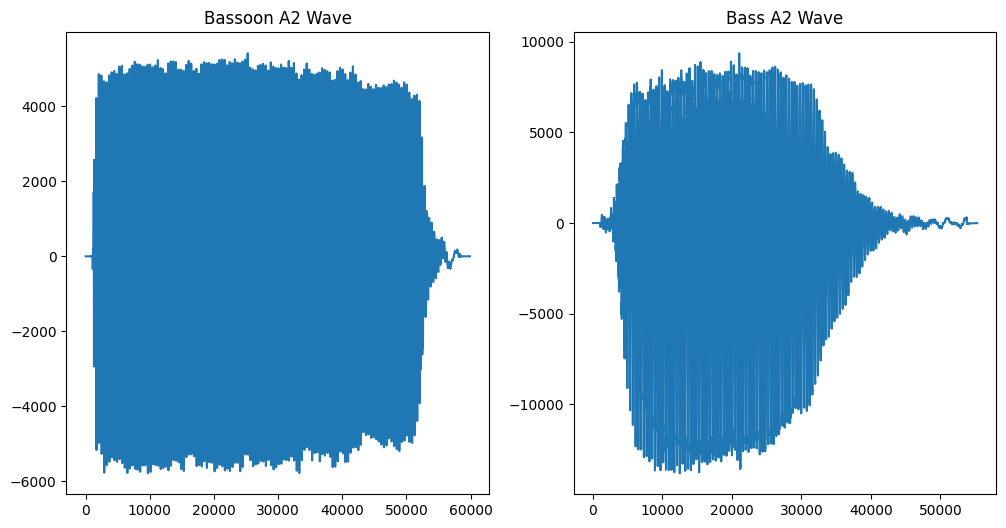

In [141]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))
ax[0].plot(bassoon_A2)
ax[0].set_title("Bassoon A2 Wave")
ax[1].plot(bass_A2)
ax[1].set_title("Bass A2 Wave")
plt.show()

In [50]:
print("A2 Period =", rate / freq)

A2 Period = 400.90909090909093


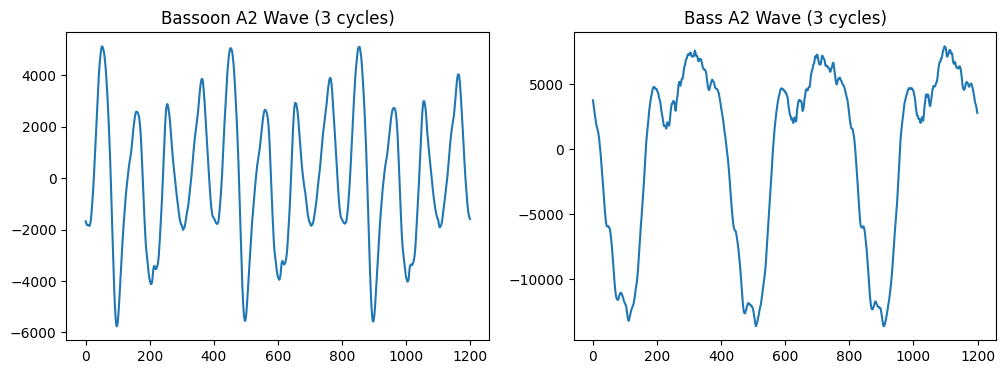

In [235]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))
ax[0].plot(bassoon_A2[10000:11200])
ax[0].set_title("Bassoon A2 Wave (3 cycles)")
ax[1].plot(bass_A2[10000:11200])
ax[1].set_title("Bass A2 Wave (3 cycles)")
plt.show()

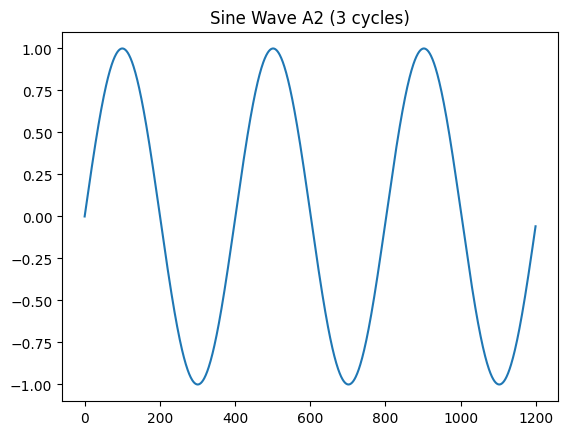

In [143]:
plt.plot(sin_A2[0:1200])
plt.title("Sine Wave A2 (3 cycles)")
plt.show()

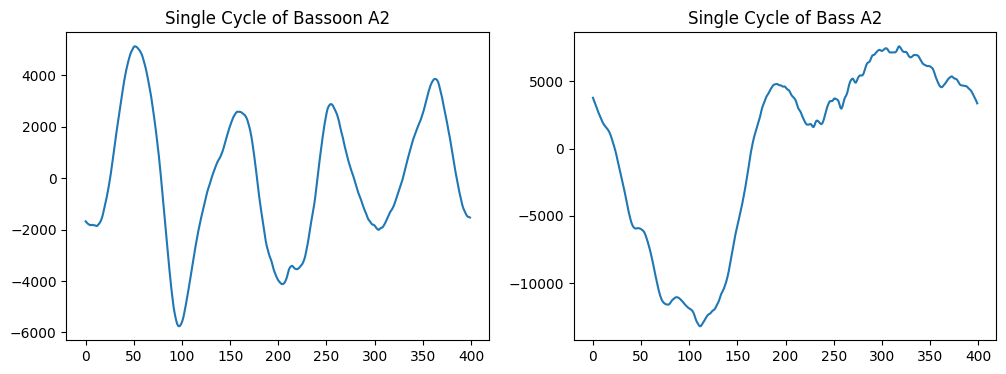

In [236]:
bassoon_cycle = bassoon_A2[10000:10400]
bass_cycle = bass_A2[10000:10400]


fig, ax = plt.subplots(1, 2, figsize = (12,4))
ax[0].plot(bassoon_cycle)
ax[0].set_title("Single Cycle of Bassoon A2")
ax[1].plot(bass_cycle)
ax[1].set_title("Single Cycle of Bass A2")
plt.show()

In [146]:
fake_bassoon = np.tile(bassoon_cycle, 110)
print("Fake Bassoon (repeated cycle):")
disp_audio(fake_bassoon, rate)
print("Real Bassoon:")
disp_audio(bassoon_A2, rate)

Fake Bassoon (repeated cycle):


Real Bassoon:


In [147]:
fake_bass = np.tile(bass_cycle, 110)
print("Fake Bass (repeated cycle):")
disp_audio(fake_bass, rate)
print("Real Bass:")
disp_audio(bass_A2, rate)

Fake Bass (repeated cycle):


Real Bass:


In [211]:
def fourierSeries(x):
    L = x.size
    a = np.zeros_like(x)
    b = np.zeros_like(x)
    n = np.arange(L)
    for k in range(L):
        a[k] = (2.0 / L) * np.sum(np.cos(2.0 * np.pi * k * n / L) * x[n])
        b[k] = (2.0 / L) * np.sum(np.sin(2.0 * np.pi * k * n / L) * x[n])
    return np.stack((a, b))

def reconstructSignal(L, f):
    x = np.zeros(L)
    a = f[0,:]
    b = f[1,:]
    k = np.arange(1, a.size)
    for n in range(L):
        x[n] = a[0] / 2.0 + np.sum(a[k] * np.cos(2.0 * np.pi * k * n / L) + b[k] * np.sin(2.0 * np.pi * k * n / L))
    return x

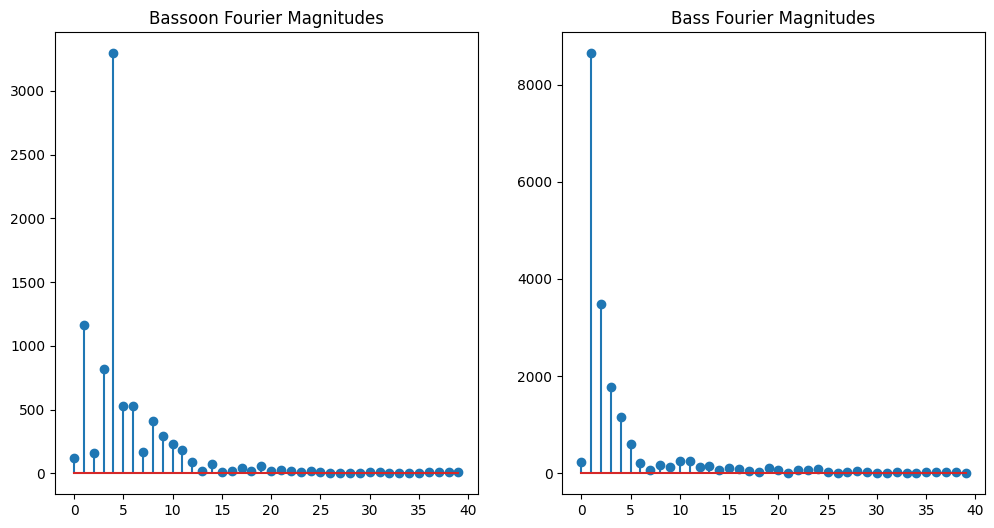

In [207]:
f_bassoon = fourierSeries(bassoon_cycle)
f_bassoon_mags = np.sqrt(f_bassoon[0,:]**2 + f_bassoon[1,:]**2)

f_bass = fourierSeries(bass_cycle)
f_bass_mags = np.sqrt(f_bass[0,:]**2 + f_bass[1,:]**2)

fig, ax = plt.subplots(1, 2, figsize = (12,6))
ax[0].stem(f_bassoon_mags[0:40])
ax[0].set_title("Bassoon Fourier Magnitudes")
ax[1].stem(f_bass_mags[0:40])
ax[1].set_title("Bass Fourier Magnitudes")
plt.show()

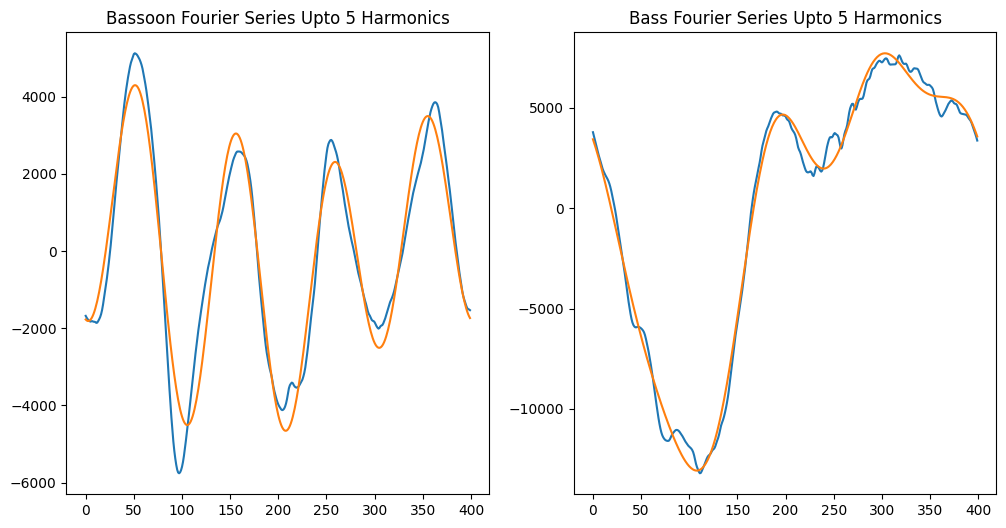

In [283]:
N = 5

# Just keep the first N harmonics
f_bassoon_N = f_bassoon[:, 0:N]
f_bass_N = f_bass[:, 0:N]

bassoon_recon = reconstructSignal(400, f_bassoon_N)
bass_recon = reconstructSignal(400, f_bass_N)

fig, ax = plt.subplots(1, 2, figsize = (12,6))
ax[0].plot(bassoon_cycle)
ax[0].plot(bassoon_recon)
ax[0].set_title("Bassoon Fourier Series Upto " + str(N) + " Harmonics")
ax[1].plot(bass_cycle)
ax[1].plot(bass_recon)
ax[1].set_title("Bass Fourier Series Upto " + str(N) + " Harmonics")
plt.show()

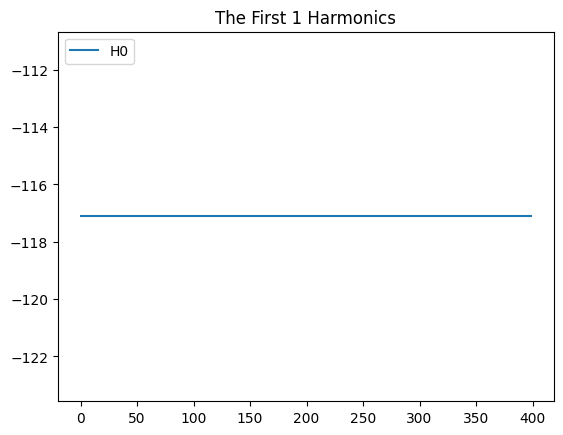

In [289]:
L = bassoon_cycle.size
n = np.arange(L)
N = 1

for k in range(N):
    c = f_bassoon[0,k] * np.cos(2.0 * np.pi * n * k / L)
    s = f_bassoon[1,k] * np.sin(2.0 * np.pi * n * k / L)
    plt.plot(n, c + s, label = "H" + str(k))
plt.title("The First " + str(N) + " Harmonics")
plt.legend(loc = 'upper left')
plt.show()

In [277]:
fake_bassoon = np.tile(bassoon_recon, 110)
print("Fake Bassoon with " + str(N) + " harmonics:")
display(HTML(Audio(data = fake_bassoon, rate = rate)._repr_html_()))
print("Real Bassoon:")
display(HTML(Audio(data = bassoon_A2, rate = rate)._repr_html_()))

Fake Bassoon with 5 harmonics:


Real Bassoon:


In [281]:
fake_bass = np.tile(bass_recon, 110)
print("Fake Bass with " + str(N) + " harmonics:")
display(HTML(Audio(data = fake_bass, rate = rate)._repr_html_()))
print("Real Bass:")
display(HTML(Audio(data = bass_A2, rate = rate)._repr_html_()))

Fake Bass with 50 harmonics:


Real Bass:


In [248]:
notes = [9,5,2,0,2,5,9,14,10,9]
fake_tune = np.array([0])
for k in notes:
    fake_tune = np.concatenate((fake_tune, np.tile(reconstructSignal(int(400 * 2.0**(k/12)), f_bassoon_N), 22)))


display(HTML(Audio(data = fake_tune, rate = rate)._repr_html_()))